<a href="https://colab.research.google.com/github/BESTHAVENKATACHARAN/EEG-BASED-EMOTION-RECOGNITION/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.95      0.98      0.96       143
     NEUTRAL       0.99      0.97      0.98       148
    POSITIVE       0.94      0.93      0.93       136

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427



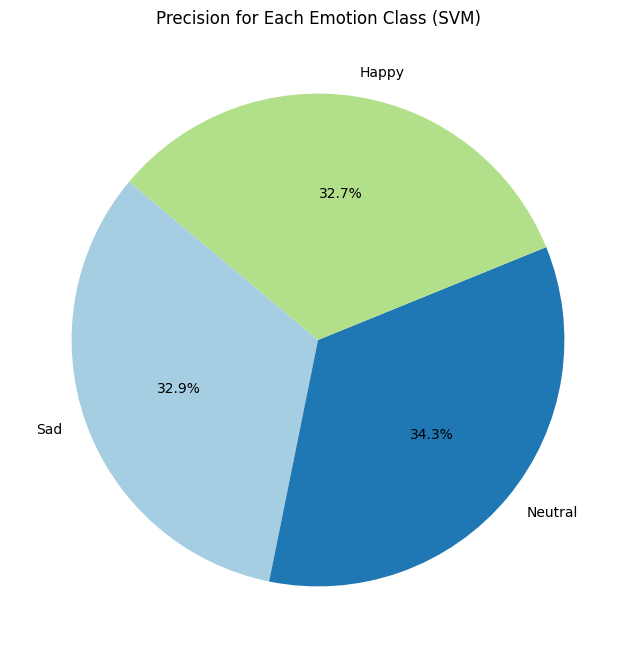

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('emotions.csv')

# Separate features and labels
X = data.iloc[:, :-1].values  # All columns except the last
labels = data['label']        # The last column

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)
label_dict = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_model = SVC(kernel='rbf', C=1, gamma='scale', probability=True)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Predict using the SVM model
y_pred = svm_model.predict(X_test)

# Get classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report:\n", report)

# Extract precision scores from classification report
report_dict = classification_report(y_test, y_pred, output_dict=True)
# Get encoded label for each class name
precision_scores = [report_dict[str(label_encoder.transform([label])[0])]['precision'] for label in label_encoder.classes_]
# Map the original class names (e.g., 'positive', 'negative', 'neutral') to updated labels
updated_labels = {
    "POSITIVE": "Happy",
    "NEGATIVE": "Sad",
    "NEUTRAL": "Neutral"
}

# Map class labels to updated labels
mapped_labels = [updated_labels.get(label, label) for label in label_encoder.classes_]

# Plot classification report as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    precision_scores,
    labels=mapped_labels,  # Use the updated mapped labels
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired(range(len(mapped_labels)))  # Adjust colors dynamically
)
plt.title('Precision for Each Emotion Class (SVM)')
plt.savefig('svm_classification_report_pie_chart.png')
plt.show()
